In [ ]:
# Importing libraries for data manipulation, analysis, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Importing libraries for data manipulation, analysis, and visualization
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv(r'/content/yield_df.csv.zip')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#printing the first 5 rows
data.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
# Removing the first column from the DataFrame
# Displaying a summary of the DataFrame, including the index, column names, non-null counts, and data types
data = data.iloc[:,1:]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [ ]:
# Producing detailed statistics for the DataFrame's numerical columns
data.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [ ]:
# Displaying the list of column names in the DataFrame
data.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [ ]:
# Extracting the target variable 'hg/ha_yield' from the DataFrame
target = data['hg/ha_yield']

In [ ]:

# Handle missing values (if any)
data.fillna(method='ffill', inplace=True)  # Forward fill to handle any missing values

# Convert data types if necessary (all seem appropriate here)
# data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Remove duplicates if any
data.drop_duplicates(inplace=True)

# Normalize/standardize the numerical columns if necessary
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']] = scaler.fit_transform(
    data[['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']]
)

C:\Users\Spandana\AppData\Local\Temp\ipykernel_25180\482236202.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill to handle any missing values


<Axes: >

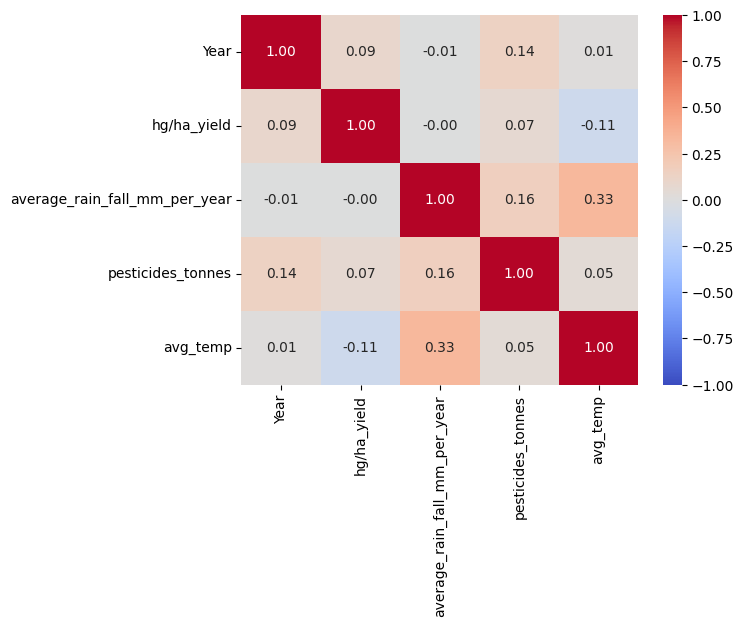

In [ ]:
# Calculating the correlation matrix for the DataFrame (excluding the first two columns)
# Visualizing the correlation matrix using a heatmap with annotations and a color map
corr = data.iloc[:,2:].corr( )
sns.heatmap(corr,annot=True, cmap='coolwarm', fmt=".2f",vmin=-1)

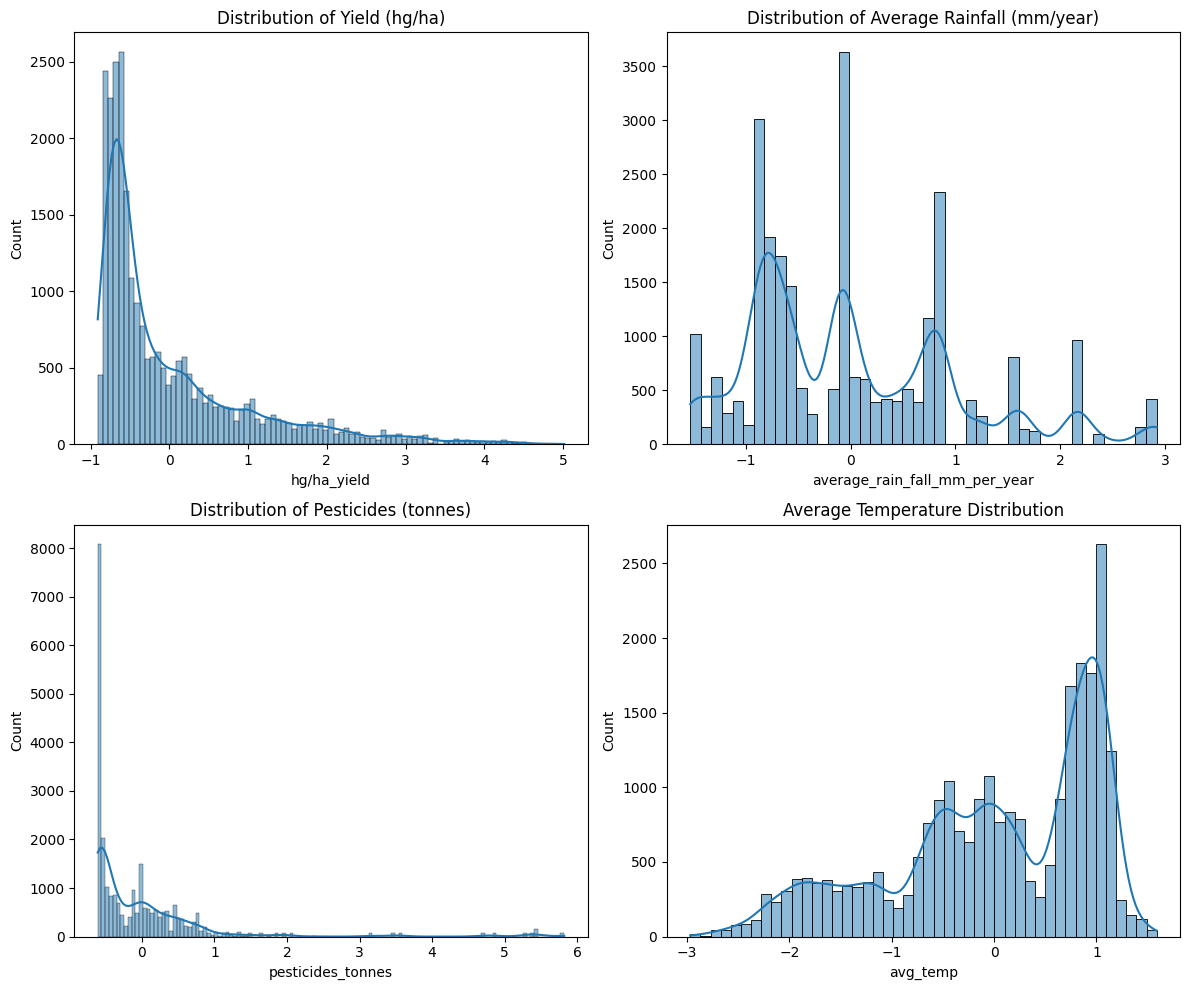

In [ ]:
# Distribution plots for numerical features
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(data['hg/ha_yield'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Yield (hg/ha)')

sns.histplot(data['average_rain_fall_mm_per_year'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Average Rainfall (mm/year)')

sns.histplot(data['pesticides_tonnes'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Pesticides (tonnes)')

sns.histplot(data['avg_temp'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Average Temperature Distribution')
# Adjusting the layout of the plot
# Displaying the plot
plt.tight_layout()
plt.show()


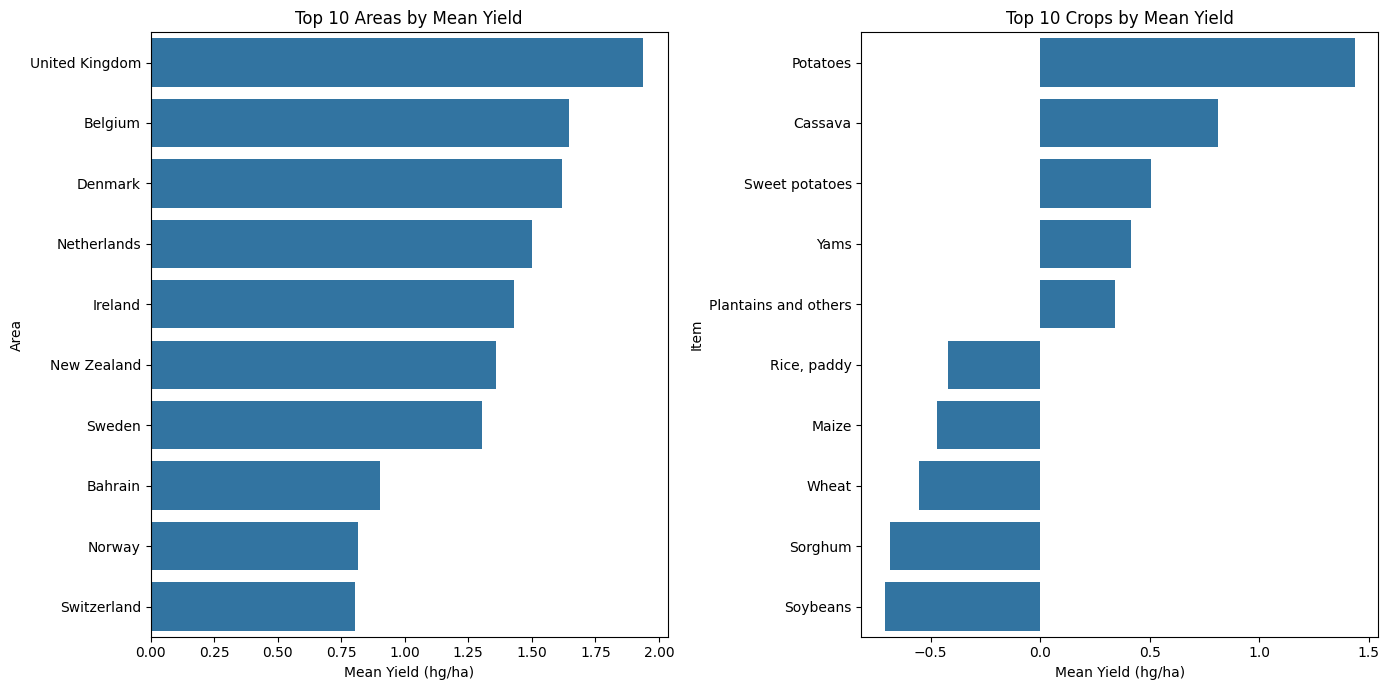

In [ ]:
# Visualizing yield by Area and Item
# Top 10 areas and crops by mean yield
top_areas = data.groupby('Area')['hg/ha_yield'].mean().sort_values(ascending=False).head(10)
top_items = data.groupby('Item')['hg/ha_yield'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(x=top_areas.values, y=top_areas.index)
plt.title('Top 10 Areas by Mean Yield')
plt.xlabel('Mean Yield (hg/ha)')

plt.subplot(1, 2, 2)
sns.barplot(x=top_items.values, y=top_items.index)
plt.title('Top 10 Crops by Mean Yield')
plt.xlabel('Mean Yield (hg/ha)')
# Adjusting the layout of the plot
# Displaying the plot
plt.tight_layout()
plt.show()


In [ ]:
# Importing functions and classes for machine learning and model evaluation
# For splitting data into training and testing sets
# For creating and using linear regression models
# For evaluating model performance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the dataset for modeling
features = data[['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']]
target = data['hg/ha_yield']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)




In [ ]:
X_train.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
4907,-0.751120,-0.568788,-1.839065
10399,-0.777606,-0.472982,-1.565742
23617,-0.408205,-0.450790,-0.790811
16174,1.260374,-0.591899,1.100706
9077,-0.622875,0.104112,-1.481882


In [ ]:
# Printing the Mean Squared Error (MSE) and R-Squared (R²) values to evaluate the model's
print(f'MSE: {mse} \nR-Squared: {r2}')

MSE: 0.9889966503312805 
R-Squared: 0.014732392015876283


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding for the categorical variables 'Area' and 'Item'
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(data[['Area', 'Item']])

# Create a DataFrame for the encoded features and concatenate with the original data
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Area', 'Item']))


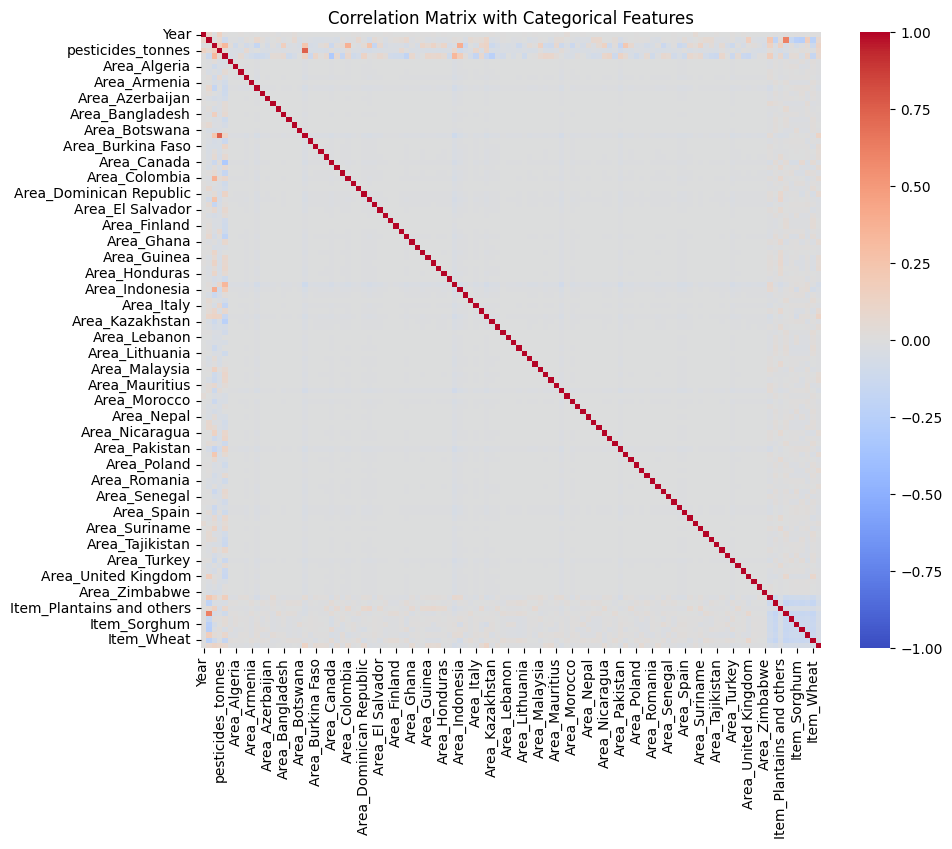

In [ ]:
model_data = pd.concat([data.drop(['Area', 'Item'], axis=1).reset_index(drop=True), encoded_df], axis=1)

# Correlation matrix for the new dataset with encoded categorical features
corr_matrix_full = model_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_full, cmap='coolwarm',vmin=-1)
plt.title("Correlation Matrix with Categorical Features")
plt.show()

# Prepare data for modeling with categorical features
features_full = model_data.drop('hg/ha_yield', axis=1)
target_full = model_data['hg/ha_yield']

# Split the data into training and testing sets
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(features_full, target_full, test_size=0.2, random_state=0)


In [ ]:
X_train_full.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,Area_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
4337,2005,-0.751120,-0.568788,-1.839065,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9829,1995,-0.777606,-0.472982,-1.565742,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21514,1993,-0.408205,-0.450790,-0.790811,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14928,2012,1.260374,-0.591899,1.100706,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8507,2007,-0.622875,0.104112,-1.481882,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

# Fit the model with the new dataset
model_full = LinearRegression()
model_full.fit(X_train_full, y_train_full)

# Predictions and model evaluation with the new dataset
y_pred_full = model_full.predict(X_test_full)
mse_full = mean_squared_error(y_test_full, y_pred_full)
r2_full = r2_score(y_test_full, y_pred_full)


In [ ]:
#printing the values for evaluate the model's
print(f'MSE: {mse_full} \nR-Squared: {r2_full}')


MSE: 0.25364410521370484 
R-Squared: 0.7473122677013417


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

def clean_data(data):
    # Handle missing values (if any)
    data.fillna(method='ffill', inplace=True)  # Forward fill to handle any missing values

    # Remove duplicates if any
    data.drop_duplicates(inplace=True)

    # Normalize/standardize the numerical columns
    scaler = StandardScaler()
    data[['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']] = scaler.fit_transform(
        data[['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']]
    )

    # One-hot encoding for the categorical variables 'Area' and 'Item'
    encoder = OneHotEncoder(sparse_output=False)
    encoded_features = encoder.fit_transform(data[['Area', 'Item']])

    # Create a DataFrame for the encoded features and concatenate with the original data
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Area', 'Item']))
    cleaned_data = pd.concat([data.drop(['Area', 'Item'], axis=1).reset_index(drop=True), encoded_df], axis=1)

    return cleaned_data

data = pd.read_csv(r'yield_df.csv/yield_df.csv')
cleaned_data = clean_data(data)

C:\Users\Spandana\AppData\Local\Temp\ipykernel_25180\2835173647.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill to handle any missing values


In [ ]:
cleaned_data = cleaned_data.drop(columns=['Unnamed: 0'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

def train_and_evaluate_model(model, features, target):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

    # Train the model
    model.fit(X_train, y_train)

    # Predictions and model evaluation
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, r2

def evaluate_models(data):
    features = data.drop('hg/ha_yield', axis=1)
    target = data['hg/ha_yield']

    models = {
        'Linear Regression': LinearRegression(),
        'Support Vector Machine': SVR(),
        'Decision Tree': DecisionTreeRegressor(),
        'XGBoost': XGBRegressor()
    }

    results = {}
    for model_name, model in models.items():
        mse, r2 = train_and_evaluate_model(model, features, target)
        results[model_name] = {'MSE': mse, 'R-Squared': r2}

    return results

model_results = evaluate_models(cleaned_data)

for model_name, metrics in model_results.items():
    print(f'{model_name} - MSE: {metrics["MSE"]}, R-Squared: {metrics["R-Squared"]}')

Linear Regression - MSE: 0.24871445401096717, R-Squared: 0.7597270415916183
Support Vector Machine - MSE: 1.2383011935141384, R-Squared: -0.19627261853125821
Decision Tree - MSE: 0.01978444001374273, R-Squared: 0.980887053985429
XGBoost - MSE: 0.025422035526034576, R-Squared: 0.9754408013442839


In [ ]:
# Renaming the column 'hg/ha_yield' to 'yield' in the cleaned_data DataFrame for clarity
cleaned_data.rename(columns={'hg/ha_yield': 'yield'}, inplace=True)


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

data.rename(columns={'hg/ha_yield': 'yield'}, inplace=True)

# Filter the relevant columns
anova_data = data[['Area', 'yield']]
anova_data.rename(columns={'yield': 'crop_yield'}, inplace=True)




C:\Users\Spandana\AppData\Local\Temp\ipykernel_25180\1415098439.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anova_data.rename(columns={'yield': 'crop_yield'}, inplace=True)


In [ ]:
# Prepare the ANOVA model
model = ols('crop_yield ~ C(Area)', data=anova_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table)

                sum_sq       df          F  PR(>F)
C(Area)    4116.248198    100.0  48.013153     0.0
Residual  24125.751802  28141.0        NaN     NaN
